### Ví dụ 1:

In [58]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(10)
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 100
X0 = np.random.multivariate_normal(means[0], cov, N) # class 1
X1 = np.random.multivariate_normal(means[1], cov, N) # class -1
X = np.concatenate((X0.T, X1.T), axis = 1) # all data
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1) # labels

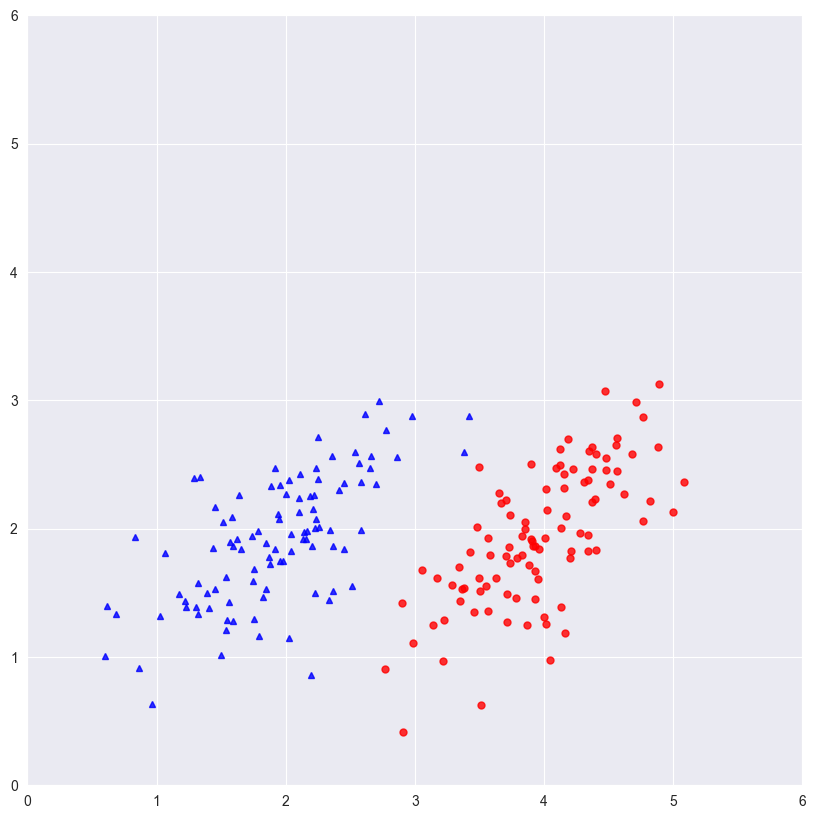

In [59]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
ani = plt.cla()
#plot points
ani = plt.plot(X0.T[0, :], X0.T[1, :], 'b^', markersize = 5, alpha = .8)
ani = plt.plot(X1.T[0, :], X1.T[1, :], 'ro', markersize = 5, alpha = .8)
ani = plt.axis([0 , 6, 0, 6])
plt.show()

In [60]:
#!pip install cvxopt
from cvxopt import matrix, solvers
# build P ~ K
V = np.concatenate((X0.T, -X1.T), axis = 1)
P = matrix(V.T.dot(V)) # P ~ K in slide see definition of V, K near eq (8)
q = matrix(-np.ones((2*N, 1))) # all-one vector
# build A, b, G, h
G = matrix(-np.eye(2*N)) # for all lambda_n >= 0! note that we solve -g(lambda) ->
min
h = matrix(np.zeros((2*N, 1)))
A = matrix(y) # the equality constrain is actually y^T lambda = 0
b = matrix(np.zeros((1, 1)))
solvers.options['show_progress'] = False
sol = solvers.qp(P, q, G, h, A, b)
l = np.array(sol['x']) # lambda
print('lambda = ')
print(l.T)

lambda = 
[[6.43830372e-10 4.72988123e-10 6.96301261e-10 5.79332567e-10
  5.85394979e-10 5.88997480e-10 4.89184241e-10 5.67664894e-10
  4.93959294e-10 8.11159682e-10 7.35998382e+01 5.84752419e-10
  6.33981206e-10 5.70452608e-10 5.33265242e-10 6.21992621e-10
  6.30547706e-10 6.42898737e-10 6.23309373e-10 7.19237900e-10
  6.37162151e-10 5.62750934e-10 5.43352984e-10 5.34317125e-10
  6.12473191e-10 5.54489279e-10 5.15178968e-10 6.11949009e-10
  7.11337568e-10 6.01640553e-10 6.16174828e-10 7.08582794e-10
  6.28907978e-10 9.47883550e-10 5.60470453e-10 5.73546044e-10
  5.40206464e-10 5.84839273e-10 4.52413498e-10 5.71685468e-10
  6.69868839e-10 4.47707836e-10 3.99526097e-10 5.50379371e-10
  8.79639914e-10 6.28698683e-10 6.73190935e-10 6.03403938e-10
  5.36740042e-10 1.22567795e-09 8.50987129e-10 4.93131967e-10
  6.05327442e-10 5.32588255e-10 7.14356409e-10 6.36992251e-10
  7.63436068e-10 5.89166800e-10 5.36104164e-10 9.45023473e-10
  6.67949637e-10 6.12129203e-10 6.46493582e-10 6.24525894e-1

In [61]:
epsilon = 1e-6 # just a small number, greater than 1e-9, to filter values of lambda
S = np.where(l > epsilon)[0]
VS = V[:, S]
XS = X[:, S]
yS = y[:, S]
lS = l[S]
# calculate w and b
w = VS.dot(lS)
w0 = np.mean(yS.T - w.T.dot(XS))
print('W = ', w.T)
print('W0 = ', w0)

W =  [[-10.10601344   6.8886009 ]]
W0 =  17.241417859321295


/var/folders/2p/p4mj443j4j56m0lgzq98w6qc0000gp/T/ipykernel_84869/781851247.py:29: MatplotlibDeprecationWarning: Keeping empty pdf files is deprecated since 3.8 and support will be removed in 3.10.
  ax.add_artist(circle)


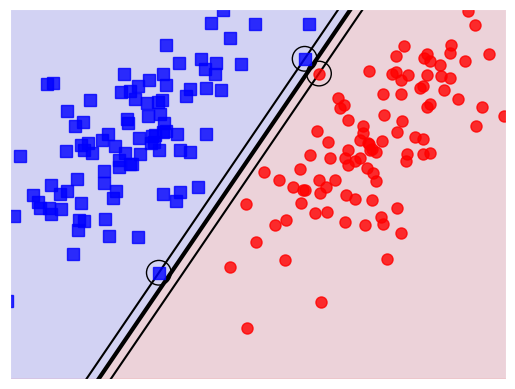

In [62]:
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('D:\\svm4hardmargin.pdf') as pdf:
    # draw
    # plot points
    fig, ax = plt.subplots()
    x1 = np.arange(-10, 10, 0.1)
    y1 = -w[0, 0]/w[1, 0]*x1 - w0/w[1, 0]
    y2 = -w[0, 0]/w[1, 0]*x1 - (w0-1)/w[1, 0]
    y3 = -w[0, 0]/w[1, 0]*x1 - (w0+1)/w[1, 0]
    plt.plot(x1, y1, 'k', linewidth = 3)
    plt.plot(x1, y2, 'k')
    plt.plot(x1, y3, 'k')
    y4 = 10*x1
    plt.plot(x1, y1, 'k')
    plt.fill_between(x1, y1, color='red', alpha=0.1)
    plt.fill_between(x1, y1, y4, color = 'blue', alpha = 0.1)
    plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
    plt.axis('equal')
    plt.ylim(0, 3)
    plt.xlim(2, 4)
    # hide tikcs
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])
    # add circles around support vectors
    for m in S:
        circle = plt.Circle((X[0, m], X[1, m] ), 0.1, color='k', fill = False)
        ax.add_artist(circle)

In [63]:
from sklearn.svm import SVC
# Copy and put code for generate data here
y1 = y.reshape((2*N,))
X1 = X.T # each sample is one row
clf = SVC(kernel = 'linear', C = 1e5) # just a big number
# if C is small, method will be “SoftMagin SVM”,
# if C is large enough, method is near to hard margin
clf.fit(X1, y1)
w = clf.coef_
w0 = clf.intercept_
print('w = ', w)
print('W0 = ', w0)

w =  [[-10.10242378   6.88613861]]
W0 =  [17.23542499]


### Bài tập thực hành 1:

Tạo dữ liệu

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cvxopt import matrix, solvers
from sklearn.metrics import accuracy_score, confusion_matrix

np.random.seed(10)
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 100

X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)

X = np.concatenate((X0.T, X1.T), axis=1)   # (2, 200)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis=1)


Giải Hard Margin SVM (Lagrange đối ngẫu)

In [65]:
V = np.concatenate((X0.T, -X1.T), axis=1)

P = matrix(V.T @ V)
q = matrix(-np.ones((2*N, 1)))

G = matrix(-np.eye(2*N))     # λ ≥ 0
h = matrix(np.zeros((2*N, 1)))

A = matrix(y)
b = matrix(np.zeros((1, 1)))

solvers.options['show_progress'] = False
sol = solvers.qp(P, q, G, h, A, b)

l = np.array(sol['x']).flatten()


Lọc support vectors & tính w, w₀

In [66]:
epsilon = 1e-6
S = np.where(l > epsilon)[0]

VS = V[:, S]
XS = X[:, S]
yS = y[:, S]
lS = l[S]

w = VS @ lS
w = w.reshape(-1, 1)

w0 = np.mean(yS.flatten() - (w.T @ XS).flatten())


Dự đoán

In [67]:
X_data = X
y_true = y.flatten()

scores = (w.T @ X_data + w0).flatten()
y_pred = np.sign(scores)
y_pred[y_pred == 0] = 1


Accuracy & Confusion Matrix

In [68]:
acc = accuracy_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)

print("Accuracy =", acc)
print("Confusion Matrix:\n", cm)


Accuracy = 1.0
Confusion Matrix:
 [[100   0]
 [  0 100]]


Vẽ Confusion Matrix

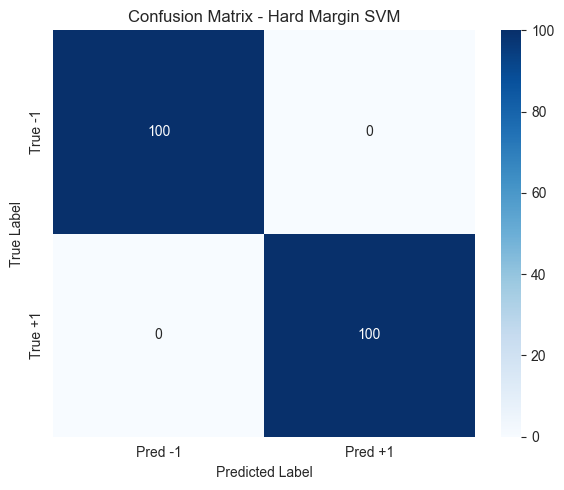

In [69]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred -1', 'Pred +1'],
            yticklabels=['True -1', 'True +1'])
plt.title('Confusion Matrix - Hard Margin SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


### Bài tập thực hành 2:

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
# Load dữ liệu ung thư vú
cancer_data = datasets.load_breast_cancer()

X = cancer_data.data        # (569, 30)
y = cancer_data.target      # (569,)

print("Kích thước dữ liệu X:", X.shape)
print("Nhãn y:", np.unique(y))



Kích thước dữ liệu X: (569, 30)
Nhãn y: [0 1]


Chia tập train / test

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=109,
    stratify=y
)


Chuẩn hóa dữ liệu

In [72]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Huấn luyện SVM

In [73]:
# C rất lớn → gần Hard Margin
clf = SVC(kernel='linear', C=1e5)

clf.fit(X_train, y_train)

w = clf.coef_
b = clf.intercept_

print("Vector trọng số w (shape):", w.shape)
print("Hệ số chệch b:", b)


Vector trọng số w (shape): (1, 30)
Hệ số chệch b: [-0.99901447]


In [74]:
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy =", acc)


Accuracy = 0.935672514619883


Confusion Matrix

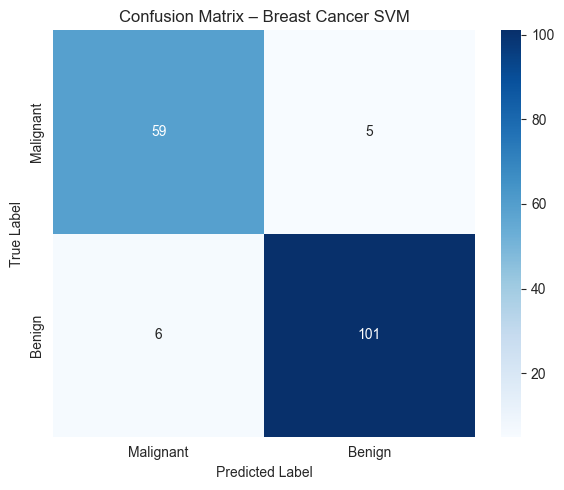

In [75]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix – Breast Cancer SVM')
plt.tight_layout()
plt.show()


Báo cáo chi tiết

In [76]:
print(classification_report(y_test, y_pred,
      target_names=['Malignant', 'Benign']))


              precision    recall  f1-score   support

   Malignant       0.91      0.92      0.91        64
      Benign       0.95      0.94      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171


### Ví dụ 2 (Bài tập tự giải):

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
# Đọc dữ liệu
data = pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab12/sonar.all-data (2).csv", header=None)

# X: 60 đặc trưng
X = data.iloc[:, :-1].values    # shape (208, 60)

# y: chuyển nhãn
# M → +1, R → -1
y = data.iloc[:, -1].map({'M': 1, 'R': -1}).values



In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


Chuẩn hóa dữ liệu

In [79]:
# chuẩn hóa L2
X_train = X_train / np.linalg.norm(X_train, axis=1, keepdims=True)
X_test  = X_test  / np.linalg.norm(X_test, axis=1, keepdims=True)


Đưa dữ liệu về đúng dạng toán học của bài giảng

In [80]:
X_train = X_train.T     # shape (60, n_train)
y_train = y_train.reshape(1, -1)


Huấn luyện SVM Hard Margin bằng Lagrange đối ngẫu

In [81]:
# V = y_i * x_i
V = X_train * y_train

n = X_train.shape[1]

P = matrix(V.T @ V)
q = matrix(-np.ones((n, 1)))

G = matrix(-np.eye(n))
h = matrix(np.zeros((n, 1)))

A = matrix(y_train.astype(float))
b = matrix(np.zeros((1, 1)))

solvers.options['show_progress'] = False
sol = solvers.qp(P, q, G, h, A, b)

l = np.array(sol['x']).flatten()


Tính vector trọng số w và w0

In [82]:
epsilon = 1e-6
S = np.where(l > epsilon)[0]   # support vectors

VS = V[:, S]
XS = X_train[:, S]
yS = y_train[:, S]
lS = l[S]

# w và w0
w = VS @ lS
w = w.reshape(-1, 1)

w0 = np.mean(yS.flatten() - (w.T @ XS).flatten())

print("Số support vectors:", len(S))


Số support vectors: 50


Dự đoán trên tập test

In [83]:
def predict(X, w, b):
    scores = w.T @ X + b
    y_pred = np.sign(scores)
    y_pred[y_pred == 0] = 1
    return y_pred.flatten()
# chuẩn bị dữ liệu test
X_test = X_test.T

y_pred = predict(X_test, w, w0)


Đánh giá Accuracy & Confusion Matrix

In [84]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy =", acc)
print("Confusion Matrix:\n", cm)


Accuracy = 0.8095238095238095
Confusion Matrix:
 [[22  6]
 [ 6 29]]


Vẽ Confusion Matrix

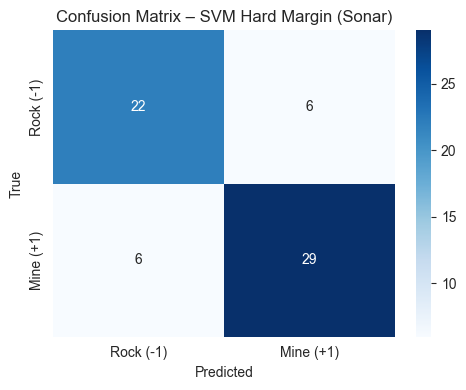

In [85]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Rock (-1)', 'Mine (+1)'],
            yticklabels=['Rock (-1)', 'Mine (+1)'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – SVM Hard Margin (Sonar)")
plt.tight_layout()
plt.show()
